In [201]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pyvis.network import Network
import networkx as nx
import warnings 
warnings.filterwarnings('ignore')

### **Example**

In [12]:
pulp.pulpTestAll()

AttributeError: module 'pulp.pulp' has no attribute 'pulpTestAll'

In [ ]:
"""
A set partitioning model of a wedding seating problem
Authors: Stuart Mitchell 2009
"""

import pulp

max_tables = 5
max_table_size = 4
guests = "A B C D E F G I J K L M N O P Q R".split()


def happiness(table):
    """
    Find the happiness of the table
    - by calculating the maximum distance between the letters
    """
    return abs(ord(table[0]) - ord(table[-1]))


# create list of all possible tables
possible_tables = [tuple(c) for c in pulp.allcombinations(guests, max_table_size)]

# create a binary variable to state that a table setting is used
x = pulp.LpVariable.dicts(
    "table", possible_tables, lowBound=0, upBound=1, cat=pulp.LpInteger
)

seating_model = pulp.LpProblem("Wedding Seating Model", pulp.LpMinimize)

seating_model += pulp.lpSum([happiness(table) * x[table] for table in possible_tables])

# specify the maximum number of tables
seating_model += (
    pulp.lpSum([x[table] for table in possible_tables]) <= max_tables,
    "Maximum_number_of_tables",
)

# A guest must seated at one and only one table
for guest in guests:
    seating_model += (
        pulp.lpSum([x[table] for table in possible_tables if guest in table]) == 1,
        "Must_seat_%s" % guest,
    )

seating_model.solve()

print("The choosen tables are out of a total of %s:" % len(possible_tables))
for table in possible_tables:
    if x[table].value() == 1.0:
        print(table)

/Users/ginger/Desktop/ME 308/.venv/lib/python3.9/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ginger/Desktop/ME 308/.venv/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/c2/86lcptg10q92xtb58l8rcq_h0000gn/T/6e5a2a0065be4673b663ffd9c8764ae7-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/c2/86lcptg10q92xtb58l8rcq_h0000gn/T/6e5a2a0065be4673b663ffd9c8764ae7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 23 COLUMNS
At line 24708 RHS
At line 24727 BOUNDS
At line 27941 ENDATA
Problem MODEL has 18 rows, 3213 columns and 15062 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 12 - 0.01 seconds
Cgl0004I processed model has 18 rows, 3213 columns (3213 integer (3213 of which binary)) and 15062 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 

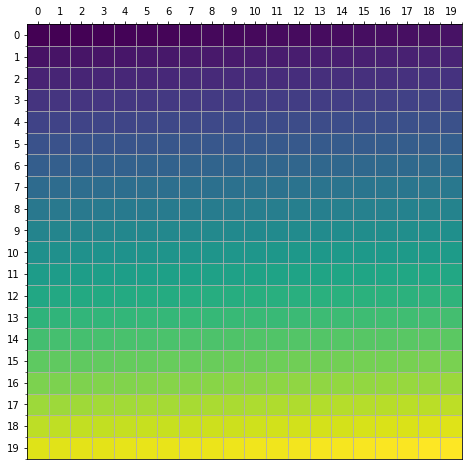

In [ ]:
# print(plt.style.available)
# ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
plt.style.use('fast')

map_size = 400
map_world = np.arange(map_size).reshape((np.sqrt(map_size).astype(np.int64), np.sqrt(map_size).astype(np.int64)))
grid_line_array = np.arange(np.sqrt(map_size).astype(np.int64)) + 0.5
# im2 = map_world.T
# im3 = np.flipud(map_world)
# im4 = np.fliplr(im2)

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 1), axes_pad=0) # similar to subplot(111)
                #  nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                #  axes_pad=0.1,  # pad between axes in inch.
                #  )

for ax, im in zip(grid, [map_world]):
    # Iterating over the grid returns the Axes.
    tick_spacing = 1
    ax.imshow(im)
    # [x.set_linewidth(5) for x in ax.spines.values()]
    ax.axes.xaxis.set_ticks_position('top')
    ax.axes.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.axes.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_xticks(grid_line_array, minor=True, linestyle="--", color='black')
    ax.set_yticks(grid_line_array, minor=True, linestyle="--", color='black')
    ax.grid(True, which = 'minor')

# plt.rc('grid', linestyle="--", color='black')
# plt.grid(True)
plt.show()

### **Data**

In [ ]:
xls = pd.ExcelFile('climate.xlsx')

sheet_map = {}
for sheet_name in xls.sheet_names:
    sheet_map[sheet_name] = xls.parse(sheet_name)

print(xls.sheet_names)

df = sheet_map['solar']
display(df)
print(df.describe())

sol = df[df.columns[-1]][4:].mean()
dsol = df[df.columns[-1]][4:].std()

print('\nMean Annual Solar Radiation: ', sol, ' kWh/m2-day')
print('Standard Deviation of Annual Solar Radiation: ', dsol, ' kWh/m2-day')

['temp', 'ws 2', 'ws10', 'solar', 'sun-day']


,Unnamed: 0,Unnamed: 1,Unnamed: 2,extraterrestrial radiation(kw-hr/m2/day),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intensity of the sun at the top of the Earth’s...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
4,15.75,72.75,8.14,9.04,9.97,10.54,10.69,10.66,10.62,10.51,10.09,9.28,8.34,7.82,9.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,21.75,78.25,7.27,8.35,9.57,10.49,10.93,11.02,10.92,10.57,9.83,8.7,7.52,6.91,9.34
208,21.75,78.75,7.27,8.35,9.57,10.49,10.93,11.02,10.92,10.57,9.83,8.7,7.52,6.91,9.34
209,21.75,79.25,7.27,8.35,9.57,10.49,10.93,11.02,10.92,10.57,9.83,8.7,7.52,6.91,9.34
210,21.75,79.75,7.27,8.35,9.57,10.49,10.93,11.02,10.92,10.57,9.83,8.7,7.52,6.91,9.34


        Unnamed: 0  Unnamed: 1  Unnamed: 2  \
count       209.00      209.00         209   
unique       14.00       17.00           8   
top          15.75       76.25           8   
freq         16.00       13.00          32   

        extraterrestrial radiation(kw-hr/m2/day)  Unnamed: 4  Unnamed: 5  \
count                                     209.00      209.00      209.00   
unique                                      8.00        8.00        6.00   
top                                         8.93        9.91       10.54   
freq                                       32.00       32.00       80.00   

        Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
count       209.00      209.00      209.00      210.00       209.00   
unique        8.00        8.00        8.00        8.00         9.00   
top          10.74       10.72       10.68       10.57        10.02   
freq         32.00       32.00       32.00       64.00        32.00   

        Unnamed: 11  Unnamed: 12

In [ ]:
df = sheet_map['ws 2']
display(df)
print(df.describe())

v2 = df[df.columns[-1]][4:].mean()
dv2 = df[df.columns[-1]][4:].std()

print('\nMean Annual Wind Speed at 2m: ', v2)
print('Standard Deviation of Annual Wind Speed at 2m: ', dv2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Wind Speed 2 m above earth(m/s),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
4,15.75,72.75,4.24,4.49,4.18,4.06,4.21,6.25,7.2,6.51,4.94,3.69,3.68,3.91,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,21.75,78.25,1.79,2.01,2.14,2.47,3.37,3.49,3.43,2.98,2.09,1.51,1.45,1.54,2.36
208,21.75,78.75,1.76,1.99,2.14,2.44,3.21,3.35,3.27,2.84,2.04,1.52,1.42,1.52,2.3
209,21.75,79.25,1.75,1.95,2.1,2.35,3,3.17,3.06,2.66,1.96,1.51,1.4,1.5,2.2
210,21.75,79.75,1.71,1.89,2.03,2.23,2.77,2.98,2.86,2.5,1.86,1.46,1.37,1.46,2.09


        Unnamed: 0  Unnamed: 1  Unnamed: 2  Wind Speed 2 m above earth(m/s)  \
count       209.00      209.00      209.00                           209.00   
unique       14.00       17.00       93.00                            84.00   
top          15.75       76.25        1.77                             1.95   
freq         16.00       13.00       10.00                             9.00   

        Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
count       209.00      209.00      209.00      209.00      209.00   
unique       86.00      100.00      123.00      148.00      157.00   
top           2.13        2.24        3.03        4.24        4.46   
freq         10.00        6.00        4.00        4.00        5.00   

        Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
count       209.00        209.0       209.00       209.00       209.00   
unique      145.00        126.0       100.00       109.00       105.00   
top           3.73          2.4

In [ ]:
df = sheet_map['ws10']
display(df)
print(df.describe())

v10 = df[df.columns[-1]][4:].mean()
dv10 = df[df.columns[-1]][4:].std()

print('\nMean Annual Wind Speed at 10m: ', v10)
print('Standard Deviation of Annual Wind Speed at 10m: ', dv10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Wind Speed 10 m above earth(m/s),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
4,15.75,72.75,4.76,5.06,4.7,4.56,4.74,7.28,8.48,7.62,5.65,4.15,4.12,4.37,5.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,21.75,78.25,2.87,3.14,3.24,3.57,4.59,4.72,4.82,4.34,3.19,2.47,2.42,2.57,3.5
208,21.75,78.75,2.82,3.11,3.24,3.54,4.41,4.54,4.6,4.15,3.14,2.49,2.38,2.53,3.42
209,21.75,79.25,2.79,3.04,3.18,3.42,4.14,4.32,4.32,3.9,3.03,2.46,2.35,2.48,3.29
210,21.75,79.75,2.75,2.97,3.1,3.27,3.87,4.09,4.07,3.69,2.88,2.38,2.32,2.45,3.15


        Unnamed: 0  Unnamed: 1  Unnamed: 2  Wind Speed 10 m above earth(m/s)  \
count       209.00      209.00       209.0                            209.00   
unique       14.00       17.00       105.0                             91.00   
top          15.75       76.25         2.9                              2.96   
freq         16.00       13.00         8.0                              9.00   

        Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
count       209.00      209.00      209.00       209.0      209.00   
unique       89.00      102.00      128.00       142.0      158.00   
top           3.14        3.08        4.13         5.7        5.73   
freq         10.00        6.00        5.00         4.0        4.00   

        Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
count       209.00       209.00       209.00       209.00       209.00   
unique      156.00       130.00       102.00       124.00       118.00   
top           4.38        

In [ ]:
r = np.exp(((v10*np.log(2)) - (v2*np.log(10)))/(v10-v2))

h = 80
vh = v2 * np.log(h/r)/np.log(2/r)
print(vh)

5.262040097995012


In [ ]:
data = pd.read_csv('subtropical_semiarid_tracking.csv')
display(data)
for col in data.columns:
    if col != 'DateTime(Local)':
        print(col)
        print(len(data[col].unique()))
        print(data[col].mean())
        print(data[col].std())
        print()

,DateTime(Local),Actual,Forecast(1 hour ahead),Forecast(2 hours ahead),Forecast(24 hours ahead)
0,01-Jan-2019 01:00:00,0.00,0.0,0.0,0.0
1,01-Jan-2019 02:00:00,0.00,0.0,0.0,0.0
2,01-Jan-2019 03:00:00,0.00,0.0,0.0,0.0
3,01-Jan-2019 04:00:00,0.00,0.0,0.0,0.0
4,01-Jan-2019 05:00:00,0.00,0.0,0.0,0.0
...,...,...,...,...,...
8755,31-Dec-2019 20:00:00,4.11,0.0,0.0,0.0
8756,31-Dec-2019 21:00:00,0.00,0.0,0.0,0.0
8757,31-Dec-2019 22:00:00,0.00,0.0,0.0,0.0
8758,31-Dec-2019 23:00:00,0.00,0.0,0.0,0.0


Actual
2188
35.246305936073064
43.1207900132742

Forecast(1 hour ahead)
2142
35.40630251141552
43.28598899591039

Forecast(2 hours ahead)
2183
35.4630605022831
43.129432930833424

Forecast(24 hours ahead)
2315
34.48148515981735
42.28012040845442



In [ ]:
data = pd.read_csv('elevation.txt', delimiter = '\t')
data.describe()

,latitude,longitude,altitude (m),desc
count,3205.000000,3205.000000,3205.000000,0.0
mean,19.522456,76.096094,431.954353,NaN
std,1.331514,2.110374,202.258942,NaN
min,15.848676,72.824957,-2.700000,NaN
25%,18.640998,74.332753,271.200000,NaN
50%,19.768068,75.661573,437.700000,NaN
75%,20.566548,77.610725,573.500000,NaN
max,21.859057,80.562742,1369.000000,NaN


### **Grid Modelling**

#### Population Estimation by Gaussian Kernel, weighted distance function used for modelling transmission costs, public acceptance of location

In [14]:
class Plant:
    def __init__(self, plant_type = 'wind', blade_length=50, density=1.023, flow_speed=20, efficiency=0.5, area = 1, insolation=1):
        self.plant_type = plant_type 

        if plant_type=='wind':# or plant_type=='hydro-kinetic':
            self.init_turbine(blade_length, density, flow_speed, efficiency)
        # elif plant_type=='hydro-potential':
        #     self.init_dam(flow_rate, efficiency, head, density)
        elif plant_type=='solar':
            self.init_solar(area, insolation)
        else:
            raise Exception('Plant should be either "wind" or "solar"!')

    def init_turbine(self, blade_length, density, flow_speed, efficiency):
        self.blade_length = blade_length
        self.density = density 
        self.flow_speed = flow_speed
        self.efficiency = efficiency

        if self.plant_type=='wind':
            if self.efficiency > 0.59:
                self.efficiency = 0.59
                print('Power coefficient for wind plant cannot be above Betz Limit 0.59, changing...')

    # def init_dam(self, flow_rate, efficiency, head, density):
    #     self.flow_rate = flow_rate
    #     self.g = 9.81
    #     self.efficiency = efficiency
    #     self.head = head
    #     self.density = density

    def init_solar(self, area, insolation):
        self.area = area  #total area of panels 
        self.H = insolation #kWh/m2-yr

    def calc_power_output(self):
        
        if self.plant_type == 'wind' or self.plant_type == 'hydro-kinetic':
            sweep_area = np.pi * self.blade_length * self.blade_length
            power = 0.5 * self.efficiency * sweep_area * self.density * ((self.flow_speed)**3)
            return np.round(power * 8760/(10**6), 2) #MWh/yr
        
        elif self.plant_type == 'solar':
            energy = 0.5 * 15.6 * np.multiply(self.area, self.H) # kWh/m2-yr
            return np.round(energy/10**3, 2) # MWh/yr
        
        # elif self.plant_type == 'hydro-potential':
        #     power = self.efficiency * self.g * self.flow_rate * self.density * self.head
        #     return np.round(power/10**3, 2) #kW

In [15]:
wind_plant = Plant(plant_type='wind', density=1.15, blade_length=52, flow_speed=12, efficiency=0.4)#0.6)
# wind_plant(50, 1.1, 15, 0.4)
wind_plant.calc_power_output()

29575.51

In [16]:
solar_plant = Plant(plant_type='solar', area = 0.004*1000**2, insolation=1200)
solar_plant.calc_power_output()

37440.0

In [251]:
# Python program for Kruskal's algorithm to find
# Minimum Spanning Tree of a given connected,
# undirected and weighted graph

from collections import defaultdict

# Class to represent a graph


class Graph:

	def __init__(self, vertices):
		self.V = vertices # No. of vertices
		self.graph = [] # default dictionary
		# to store graph

	# function to add an edge to graph
	def addEdge(self, u, v, w):
		self.graph.append([u, v, w])

	# A utility function to find set of an element i
	# (uses path compression technique)
	def find(self, parent, i):
		if parent[i] == i:
			return i
		return self.find(parent, parent[i])

	# A function that does union of two sets of x and y
	# (uses union by rank)
	def union(self, parent, rank, x, y):
		xroot = self.find(parent, x)
		yroot = self.find(parent, y)

		# Attach smaller rank tree under root of
		# high rank tree (Union by Rank)
		if rank[xroot] < rank[yroot]:
			parent[xroot] = yroot
		elif rank[xroot] > rank[yroot]:
			parent[yroot] = xroot

		# If ranks are same, then make one as root
		# and increment its rank by one
		else:
			parent[yroot] = xroot
			rank[xroot] += 1

	# The main function to construct MST using Kruskal's
		# algorithm
	def KruskalMST(self):

		result = [] # This will store the resultant MST
		
		# An index variable, used for sorted edges
		i = 0
		
		# An index variable, used for result[]
		e = 0

		# Step 1: Sort all the edges in
		# non-decreasing order of their
		# weight. If we are not allowed to change the
		# given graph, we can create a copy of graph
		self.graph = sorted(self.graph,
							key=lambda item: item[2])

		parent = []
		rank = []

		# Create V subsets with single elements
		for node in range(self.V):
			parent.append(node)
			rank.append(0)

		# Number of edges to be taken is equal to V-1
		while e < self.V - 1:

			# Step 2: Pick the smallest edge and increment
			# the index for next iteration
			u, v, w = self.graph[i]
			i = i + 1
			x = self.find(parent, u)
			y = self.find(parent, v)

			# If including this edge doesn't
			# cause cycle, include it in result
			# and increment the indexof result
			# for next edge
			if x != y:
				e = e + 1
				result.append([u, v, w])
				self.union(parent, rank, x, y)
			# Else discard the edge

		minimumCost = 0
		# print ("Edges in the constructed MST")
		result_edges = []
		for u, v, weight in result:
			minimumCost += weight
			result_edges.append((u, v, weight))
			# print("%d -- %d == %d" % (u, v, weight))
		# print("Minimum Spanning Tree" , minimumCost)

		return result_edges

In [297]:
a = np.random.randn(1,4,4)
b = np.random.randn(2,4,4)
c = np.concatenate([a,b], axis=0)
print(c.shape)
print(c[0], '\n', c[1], '\n', c[2])
c = np.min(c, axis=0)
print(c.shape)
print(c)

(3, 4, 4)
[[ 1.24955294  1.58276027 -1.7344381  -0.00638079]
 [-0.66607205 -0.76308649 -0.16904999  0.76735774]
 [-0.52569099  0.43141533 -2.41515418  1.04612531]
 [ 0.31562151  0.24458077  0.3281885  -0.64744075]] 
 [[-1.46154018 -0.02375464 -1.06016198 -0.59994066]
 [ 0.27653843 -0.23620694  1.05553143 -1.05658173]
 [ 0.22996927  0.58477078 -0.86241772  0.7451755 ]
 [-0.00506175  0.37760402  0.83237959 -0.37869455]] 
 [[-0.44696578  0.44505991 -0.51771164 -0.48185316]
 [-0.06056264  0.68729468 -0.74908816  0.45334721]
 [ 1.48163952  2.40603418  0.1430329  -0.37828267]
 [-0.28922141 -0.73422887 -1.34912957  0.10028142]]
(4, 4)
[[-1.46154018 -0.02375464 -1.7344381  -0.59994066]
 [-0.66607205 -0.76308649 -0.74908816 -1.05658173]
 [-0.52569099  0.43141533 -2.41515418 -0.37828267]
 [-0.28922141 -0.73422887 -1.34912957 -0.64744075]]


In [304]:
class GridWorld():

    def __init__(self, map_size=20):
        
        """BASIC INITIALIZATIONS"""
        
        self.map_size = map_size  # number of grid boxes
        self.len_km = 560 #km     # total length of grid
        self.grid_len = self.len_km/self.map_size   # length od one grid
        self.grid_area = self.grid_len**2
        self.city_centers = []
        # self.wind_area = 1/4 #km2/MW    area required for 1MW wind farm

        self.distr = np.zeros((map_size,map_size))  # initialization dummy                            
        print('\t\t Mean\t\t\t Standard Deviation')

        """SOLAR PLANT POWER"""
        
        self.insolation = 365 * (0.09591895501349425*np.random.randn(self.map_size, self.map_size) + 0.35 * 9.487692307692312)  # kWh/m2-yr
        print('Insolation:', '\t', self.insolation.mean(), '\t', self.insolation.std()) # 0.5 = 50% extraterrestrial rad losses and angle, incliniation, azimuth losses       
        
        area_frac = np.random.rand(self.map_size, self.map_size)*0.00004 + 0.00001
        plant_s = Plant(plant_type='solar', area = area_frac*self.grid_area*1000**2, insolation=self.insolation)
        self.power_s = plant_s.calc_power_output()
        print('Solar Power:', '\t', self.power_s.mean(), '\t', self.power_s.std())

        """WIND PLANT POWER"""
        
        # self.wind_speed = 20*np.abs(np.random.randn(self.map_size, self.map_size)     # normal distribution wind speed
        self.wind_speed = (np.random.weibull(2.75, (self.map_size, self.map_size))) * 10 # 6.4  # weibull distribution wind speed
        self.wind_speed = np.where((self.wind_speed<=25) & (self.wind_speed>=3), self.wind_speed, 0)    # weibull distribution wind speed
        print('Wind Speed:', '\t', self.wind_speed.mean(), '\t', self.wind_speed.std())
        # print(self.wind_speed)
        
        plant_w = Plant(plant_type='wind', density=1.23, blade_length=50, flow_speed=self.wind_speed, efficiency=0.59)
        self.power_w = plant_w.calc_power_output() 
        print('Wind Power:', '\t', self.power_w.mean(), '\t', self.power_w.std())

        """COST CALCULATIONS"""
        
        c1 = 12*(17110+14500)
        c2 = 12*(25960+14500)
        c3 = 12*(51920+28000)
        c4 = 12*(88500+28000)

        cp_wind = 12*256*1000*self.power_w/8760 #/MW
        cp_solar = 12*256*1000*self.power_s/8760 #/MW
        self.ct = 37500 #/km

        c1f = np.where(self.power_w<1*8760, c1+cp_wind, 0)
        c2f = np.where((self.power_w>=1*8760) & (self.power_w<5*8760), c2+cp_wind, 0)
        c3f = np.where((self.power_w>=5*8760) & (self.power_w<20*8760), c3+cp_wind, 0)
        c4f = np.where(self.power_w>=20*8760, c4+cp_wind, 0)

        self.setup_maint_costs = c1f+c2f+c3f+c4f
        print('Cost:', '\t\t', self.setup_maint_costs.mean(), '\t', self.setup_maint_costs.std())
        # print(self.power_w)
        x0 = np.random.randint(self.map_size)   #x_coord of centre
        y0 = np.random.randint(self.map_size)   #y_coord of centre 
        v = self.map_size #10 + 10 * np.random.rand()          #variance between 5 and 15

    def gen_maps(self):
        
        def gaussian_dist(a, x, y, m, v):
            return a * (1/(2*np.pi*v)) * np.exp(-(((x-m[0])**2)+((y-m[1])**2))/(2*v))

        def transmission_dist(x,y,m):
            dists = np.sqrt((((x-m[0])**2)+((y-m[1])**2)))*self.grid_len*self.ct
            return dists, None

        def acceptance_dist(a, g_kern):
            if a == 282.3/1000 or a == 111.9/1000:
                return g_kern/a
            else:
                return (a-g_kern)/a
        
        x_coords = np.tile(np.arange(self.map_size), (self.map_size,1))
        y_coords = x_coords.T

        x0 = np.random.randint(self.map_size)   #x_coord of centre
        y0 = np.random.randint(self.map_size)   #y_coord of centre 
        v = self.map_size/2 #10 + 10 * np.random.rand()          #variance between 5 and 15

        type_pop = np.random.randint(3)
        if type_pop == 0: #industrial
            a = 282.3/1000 # MWh/yr/capita
        elif type_pop == 1: #commercial
            a = 111.9/1000 #MWh/yr/capita
        elif type_pop == 2: #residential
            a = 260/1000  #MWh/yr/capita
    
        m = [x0, y0]
        self.city_centers.append(m)
        print(m, v, a)

        pop_gen = np.abs(1000000*np.random.randn()+3000000)
        pop_coef = gaussian_dist(pop_gen, x_coords, y_coords, m, v)

        g_kernel = a*pop_coef
        d_kernel, _ = transmission_dist(x_coords, y_coords, m)
        a_kernel = acceptance_dist(a, g_kernel)
        
        # print(g_kernel.sum())
        return g_kernel, d_kernel, a_kernel

    def create_kdf(self, n_distr):

        g_kdf = self.distr.copy()
        a_kdf = self.distr.copy()
        d_kdf = self.distr.copy()
        # d_coef_sum = 0

        def norm(kdf):
            return (kdf-np.amin(kdf))/(np.amax(kdf)-np.amin(kdf))

        for i in range(n_distr):
            g_kernel, d_kernel, a_kernel = self.gen_maps()
            g_kdf += g_kernel
            a_kdf += a_kernel
            
            dimx, dimy = d_kernel.shape
            d_kernel = np.reshape(d_kernel, (1, dimx, dimy))
            if i==0:
                d_kdf = d_kernel
            else:
                d_kdf = np.concatenate([d_kdf, d_kernel], axis=0)
            # d_coef_sum += d_coef
        
        # print(d_kdf.shape)
        d_kdf = np.min(d_kdf, axis=0) # /d_coef_sum
        # print(d_kdf.shape)

        return g_kdf, d_kdf, norm(a_kdf)

    def plot_grid(self, arr, colormap):

        plt.style.use('fast')
        map_world = arr
        grid_line_array = np.arange(self.map_size) + 0.5
        
        fig_size = min(self.map_size//3, 10)
        fig = plt.figure(figsize=(fig_size, fig_size))
        grid = ImageGrid(fig, 111, nrows_ncols=(1, 1), axes_pad=0)

        for ax, im in zip(grid, [map_world]):
            
            tick_spacing = 1
            ax.axes.xaxis.set_ticks_position('top')
            
            ax.axes.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
            ax.axes.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
            
            ax.set_xticks(grid_line_array, minor=True, linestyle="--", color='black')
            ax.set_yticks(grid_line_array, minor=True, linestyle="--", color='black')
            
            ax.imshow(im, cmap=colormap)
            ax.grid(True, which = 'minor')
            # plt.colorbar(mappable=im, ax=ax)
        # divider = make_axes_locatable(ax)
        # cax = divider.append_axes("right", size="5%", pad=0.05)
        # plt.colorbar(im, cax=cax)
        plt.show()

    def plot_all(self, n_distr = 1, plot = False):

        self.demand, self.transmission, self.acceptance = self.create_kdf(n_distr)
        print('Demand:', '\t\t', self.demand.sum(), '\t', self.demand.std())
        print('Transmission:', '\t\t', self.transmission.mean(), '\t', self.transmission.std())
        
        if plot:
            self.plot_grid(self.demand, 'seismic')
            print()
            self.plot_grid(self.transmission, 'seismic') 
            print()
            self.plot_grid(self.acceptance, 'RdYlGn')
            print('done')

    def optimize(self, single_obj=True):
        
        self.idxs = np.arange(self.map_size*self.map_size)
        n=self.map_size

        loc = np.zeros(n*n)
        acc = self.acceptance.reshape((self.map_size*self.map_size))
        cst = (self.transmission+self.setup_maint_costs).reshape((self.map_size*self.map_size))
        dem = self.demand.reshape((self.map_size*self.map_size))
        power = self.power_w.reshape((self.map_size*self.map_size))
        wind_speeds = self.wind_speed.reshape((self.map_size*self.map_size))

        locs = dict(zip(self.idxs, loc))
        acpt = dict(zip(self.idxs, acc))
        cost = dict(zip(self.idxs, cst))
        dmnd = dict(zip(self.idxs, dem))
        powr = dict(zip(self.idxs, power))
        winds = dict(zip(self.idxs, wind_speeds))

        avg_accpt_thresh = 0.5
        num_plants = 6
        
        if single_obj==True:

            print('\n*************************')
            print('Minimizing COST objective')
            print('*************************\n')
          
            prob = LpProblem('PP_Location_Problem')
            locs_vars = LpVariable.dicts("Locations", locs, cat='Binary')

            prob += lpSum([cost[i]*locs_vars[i] for i in self.idxs])

            prob += lpSum([locs_vars[x]*powr[x] for x in self.idxs]) >= np.sum(dem), "PowerMinimum"         # /(n*n/num_plants)
            prob += lpSum([locs_vars[x]*powr[x] for x in self.idxs]) <= 1.25*np.sum(dem), "PowerMaximum"    # /(n*n/num_plants)
            
            prob += lpSum([(acpt[x]-avg_accpt_thresh)*locs_vars[x] for x in self.idxs]) >= 0, "AcceptanceMinimum"
            
            prob += lpSum([locs_vars[x] for x in self.idxs]) <= num_plants, "NumberPPMaximum"
            
            # print(prob)

            prob.solve()

            print("Status:", LpStatus[prob.status])

            coords = []

            for v in prob.variables():
                if v.varValue>0:
                    print(v.name, "=", v.varValue)
                    coord = int(v.name.split('_')[1])
                    coords.append(coord)
                    # print(coord)

            opt_locs = np.zeros(self.map_size**2)
            for i in range(len(coords)):
                opt_locs[coords[i]] = 1
            opt_locs = opt_locs.reshape((self.map_size, self.map_size))

            obj = value(prob.objective)
            print("The minimized variable cost of this powerplant setup is: Rs. {}".format(round(obj,2)))
            print("The minimized fixed transmission cost of this powerplant setup is: Rs. {}".format(round(self.transmission_grid_setup_cost,2)))
            
            self.plot_grid(opt_locs, 'YlGn')
            return opt_locs
            
        else:

            locs_vars = LpVariable.dicts("Locations", locs, cat='Binary')

            print('\n********************************************************************')
            print('Minimizing COST + Maximizing POWER multi-objective Pareto optimality')
            print('********************************************************************\n')
            
            objs = []

            for alpha in np.linspace(0, 1, 100):
    
                prob = LpProblem(f'PP_Location_Problem_{alpha}')
                prob += alpha*lpSum([cost[i]*locs_vars[i] for i in self.idxs]) - (1-alpha)*lpSum([powr[i]*locs_vars[i] for i in self.idxs])

                prob += lpSum([(acpt[x]-avg_accpt_thresh)*locs_vars[x] for x in self.idxs]) >= 0, "AcceptanceMinimum"
                prob += lpSum([locs_vars[x] for x in self.idxs]) <= num_plants, "NumberPPMaximum"

                prob.solve()

                print("Status:", LpStatus[prob.status])

                coords = []

                for v in prob.variables():
                    if v.varValue>0:
                        print(v.name, "=", v.varValue)
                        coord = int(v.name.split('_')[1])
                        coords.append(coord)
                        # print(coord)

                opt_locs = np.zeros(self.map_size**2)
                for i in range(len(coords)):
                    opt_locs[coords[i]] = 1
                opt_locs = opt_locs.reshape((self.map_size, self.map_size))

                obj = value(prob.objective)
                objs.append(obj)
                print("The minimized variable cost of this powerplant setup is: Rs. {}".format(round(obj,2)))
                print("The minimized fixed transmission cost of this powerplant setup is: Rs. {}".format(round(self.transmission_grid_setup_cost,2)))

                # self.plot_grid(opt_locs, 'YlGn')
                # return opt_locs

            plt.plot(np.linspace(0, 1, 100), objs)
            plt.title('Objective Function vs. Pareto Coefficient')
            plt.xlabel('alpha [0-1)')
            plt.ylabel('Objective Function (Minimization Problem)')
    
    def graphical_trans(self, prob_exist, prob_impos):
        
        towns = []
        with open('towns.txt', 'r') as f:
            for line in f.readlines():
                if line.strip() != '':
                    towns.append(line.strip().split(' ')[0])
        towns_df = pd.DataFrame(towns, columns=['towns'])
        
        def dist(p1, p2):
            ppdist = np.sqrt((((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2)))*self.grid_len*self.ct
            return np.round(ppdist/10**6, 2)

        sampled = towns_df.sample(len(self.city_centers))
        towns_sampled = (sampled['towns'].values.tolist())
        df = pd.DataFrame({'Town':towns_sampled, 'Center':self.city_centers})
        city_indexer = {}
        index_citier = {}

        for i,name in enumerate(df['Town'].values): 
            city_indexer[name] = i
            index_citier[i] = name
            
            type_col = ['Undirected']*(len(df)-1)         
            name_col = [name]*(len(df)-1)
            p1 = (df['Center'][df.index[df['Town'] == name]].item())

            dest_col = []
            sim_check_col = []
            sim_check_col_rev = []
            wts = []

            for name_dest in df['Town'].values:
                if name_dest != name:
                    dest_col.append(name_dest)
                    sim_check_col.append(name+name_dest)
                    sim_check_col_rev.append(name_dest+name)
                    p2 = (df['Center'][df.index[df['Town'] == name_dest]].item())
                    wts.append(dist(p1, p2))
        
            df_new = pd.DataFrame({'Source':name_col, 'Target':dest_col, 'Type':type_col, 'Weights':wts, 'SD': sim_check_col, 'DS':sim_check_col_rev})
            if i == 0:
                df_final = df_new
                # print(df_new)
            else:
                for comb_name in df_new['DS'].values:
                    if comb_name in df_final['SD'].values:
                        df_new.drop(df_new[df_new['DS']==comb_name].index, inplace=True)
                df_final = pd.concat([df_final, df_new], ignore_index=True)
        
        df_final = df_final.drop(['DS', 'SD'], axis=1)
        for idx in range(len(df_final)):
            unif = np.random.uniform()
            if unif<prob_exist:
                df_final['Weights'][idx] = 0.0
            elif prob_exist<=unif and unif<prob_exist+prob_impos:
                df_final['Weights'][idx] = float('inf')  

        # print(len(df_final['Weights'].unique()))
        # print(len(df_final['SD']))
        # print(len(df_final))
        print('Existence/Non Existence/Setup Cost of Power Grid:')
        display(df_final)
        net = Network('900px', '1600px')#, notebook=True)
        graph = nx.from_pandas_edgelist(df_final, source = 'Source', target = 'Target', edge_attr = 'Weights')
        print(graph)
        net.from_nx(graph)
        net.show('original_graph.html')

        computation_graph = Graph(len(self.city_centers))
        for idx_ in range(len(df_final)):
            src = df_final['Source'][idx_]
            dst = df_final['Target'][idx_]
            wt =  df_final['Weights'][idx_]
            computation_graph.addEdge(city_indexer[src], city_indexer[dst], wt)
        result_edges = computation_graph.KruskalMST()
			
        print ("Edges in the Minimal Spanning Tree:\n")
        wt_min = 0
        for kkk, (srcidx, dstidx, wt) in enumerate(result_edges):
            src = index_citier[srcidx]
            dst = index_citier[dstidx]
            wt_min += wt

            print(f"{src} -- {dst} ==> {wt}")

            df_cpy = df_final[df_final['Source']==src]
            df_cpy2 = df_cpy[df_cpy['Target']==dst]
            if kkk == 0:
                df_kruskal = df_cpy2
            else:
                df_kruskal = pd.concat([df_kruskal, df_cpy2], ignore_index=True)

        print("\nMinimum Spanning Tree with Cost: " , wt_min)

        # print('Existing Grid Lines:')
        # display(df_final[df_final['Weights']==0.0])
          
        self.transmission_grid_setup_cost = wt_min*10**6

        print('\nOptimal Grid Lines:')    
        display(df_kruskal)
        print("\nMinimum fixed setup cost for a transmission model: Rs. " , )
        net_opt = Network('900px', '1600px')#, notebook=True)
        graph_opt = nx.from_pandas_edgelist(df_kruskal, source = 'Source', target = 'Target', edge_attr = 'Weights')
        print(graph_opt)
        net_opt.from_nx(graph_opt)
        net_opt.show('optimal_graph.html')

		 Mean			 Standard Deviation
Insolation: 	 1211.236798679502 	 34.96423310121633
Solar Power: 	 28379.596527423473 	 10906.681735091508
Wind Speed: 	 8.784687565663072 	 3.702626663189145
Wind Power: 	 25973.82169961735 	 28854.65553092063
Cost: 		 9645634.120946325 	 10299042.787053779
[49, 6] 28.0 0.2823
[54, 44] 28.0 0.2823
[53, 52] 28.0 0.1119
[51, 37] 28.0 0.26
[49, 47] 28.0 0.2823
[48, 1] 28.0 0.1119
[26, 21] 28.0 0.26
[7, 28] 28.0 0.26
[28, 48] 28.0 0.26
[47, 6] 28.0 0.26
Demand: 		 5292096.164791267 	 2242.7700946208915
Transmission: 		 3925454.4939966896 	 2133673.2737899884


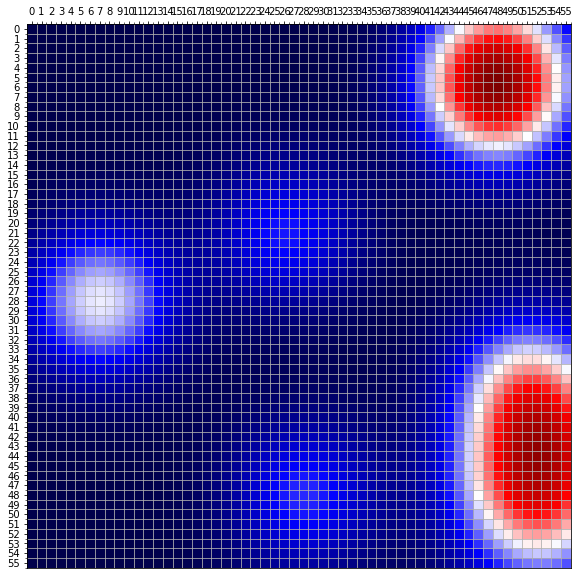

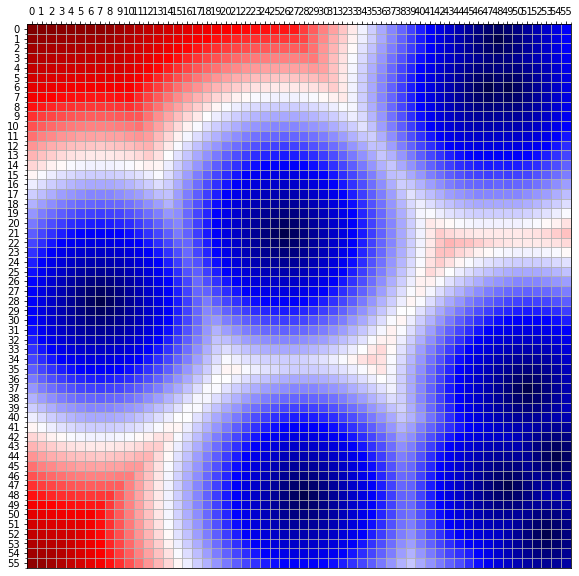

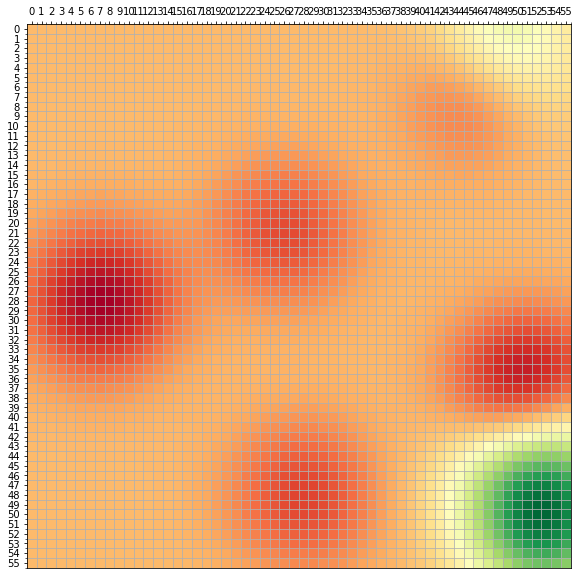

done


In [305]:
obj = GridWorld(56)
obj.plot_all(10, plot = True)

In [307]:
obj.graphical_trans(prob_exist=0.1, prob_impos=0.3)

Existence/Non Existence/Setup Cost of Power Grid:


,Source,Target,Type,Weights
0,Satara,Gadhinglaj,Undirected,inf
1,Satara,Washim,Undirected,17.32
2,Satara,Pune,Undirected,11.65
3,Satara,Vilholi,Undirected,inf
4,Satara,Umred,Undirected,inf
5,Satara,Manmad,Undirected,inf
6,Satara,Manchar,Undirected,inf
7,Satara,Igatpuri,Undirected,17.61
8,Satara,Balapur,Undirected,0.75
9,Gadhinglaj,Washim,Undirected,0.00


Graph with 10 nodes and 45 edges
Edges in the Minimal Spanning Tree:

Gadhinglaj -- Washim ==> 0.0
Vilholi -- Balapur ==> 0.0
Manmad -- Balapur ==> 0.0
Satara -- Balapur ==> 0.75
Gadhinglaj -- Vilholi ==> 2.19
Gadhinglaj -- Pune ==> 2.86
Manmad -- Manchar ==> 7.59
Washim -- Igatpuri ==> 9.49
Pune -- Umred ==> 13.55

Minimum Spanning Tree with Cost:  36.43000000000001

Optimal Grid Lines:


,Source,Target,Type,Weights
0,Gadhinglaj,Washim,Undirected,0.00
1,Vilholi,Balapur,Undirected,0.00
2,Manmad,Balapur,Undirected,0.00
3,Satara,Balapur,Undirected,0.75
4,Gadhinglaj,Vilholi,Undirected,2.19
5,Gadhinglaj,Pune,Undirected,2.86
6,Manmad,Manchar,Undirected,7.59
7,Washim,Igatpuri,Undirected,9.49
8,Pune,Umred,Undirected,13.55



Minimum fixed setup cost for a transmission model: Rs. 
Graph with 10 nodes and 9 edges



*************************
Minimizing COST objective
*************************

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ginger/Desktop/ME 308/.venv/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/c2/86lcptg10q92xtb58l8rcq_h0000gn/T/c187aac5922a4d2da2ca6e8742b92e4b-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/c2/86lcptg10q92xtb58l8rcq_h0000gn/T/c187aac5922a4d2da2ca6e8742b92e4b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 21730 RHS
At line 21735 BOUNDS
At line 24872 ENDATA
Problem MODEL has 4 rows, 3136 columns and 12312 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.01 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.02   (Wallclock seconds):       0.02

Status: Infeasible
Locations_1170 = 1.0
Locati

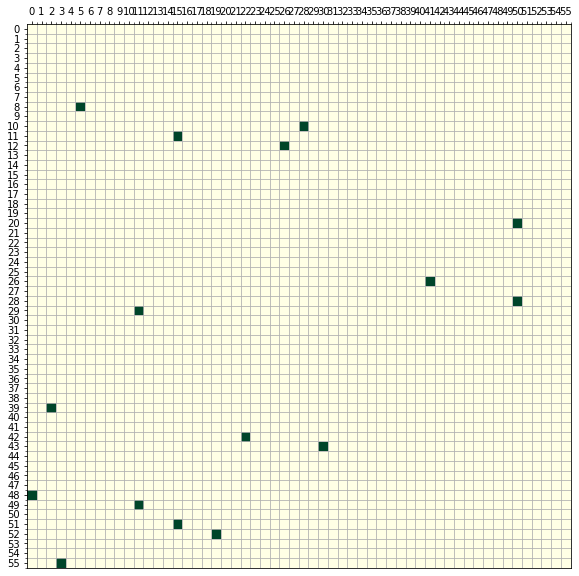

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [309]:
obj.optimize(single_obj=True)

### **Optimization Objective**

In [ ]:
n = 40
idxs = np.arange(n*n)
print(idxs)

[   0    1    2 ... 1597 1598 1599]


In [ ]:
loc = np.zeros(n*n)
acc = np.random.random(1600)
cst = np.random.random(1600)
dem = np.random.random(1600)
power = np.random.random(1600)

In [ ]:
locs = dict(zip(idxs, loc))
acpt = dict(zip(idxs, acc))
cost = dict(zip(idxs, cst))
dmnd = dict(zip(idxs, dem))
powr = dict(zip(idxs, power))

In [ ]:
locs_vars = LpVariable.dicts("Locations", locs, cat='Binary') #, lowBound=0, upBound=1, 
# acpt_vars = LpVariable.dicts("Acceptance", acpt, lowBound=0, cat='Continuous')
# cost_vars = LpVariable.dicts("Cost", cost, lowBound=0, cat='Continuous')
# dmnd_vars = LpVariable.dicts("Demand", dmnd, lowBound=0, cat='Continuous')

In [ ]:
avg_accpt_thresh = 0.5
num_plants = 5

In [ ]:
prob = LpProblem('PP_Location_Problem')
prob += lpSum([cost[i]*locs_vars[i] for i in idxs])

In [ ]:
prob += lpSum([locs_vars[x]*powr[x] for x in idxs]) >= np.sum(dem)/(n*n/num_plants), "PowerMinimum"
prob += lpSum([locs_vars[x]*powr[x] for x in idxs]) <= 1.25*np.sum(dem)/(n*n/num_plants), "PowerMaximum"

In [ ]:
prob += lpSum([(acpt[x]-avg_accpt_thresh)*locs_vars[x] for x in idxs]) >= 0, "AcceptanceMinimum"
prob += lpSum([locs_vars[x] for x in idxs]) <= num_plants, "NumberPPMaximum"

In [ ]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ginger/Desktop/ME 308/.venv/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/c2/86lcptg10q92xtb58l8rcq_h0000gn/T/72243c55452847e093740cf01d7cf9b0-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/c2/86lcptg10q92xtb58l8rcq_h0000gn/T/72243c55452847e093740cf01d7cf9b0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 11210 RHS
At line 11215 BOUNDS
At line 12816 ENDATA
Problem MODEL has 4 rows, 1600 columns and 6400 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0.0109298 - 0.00 seconds
Cgl0004I processed model has 3 rows, 1600 columns (1600 integer (1600 of which binary)) and 4800 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.221009
Cbc0038I Solution found of 0.011993
Cbc0038I Before mini branch an

1

In [ ]:
print("Status:", LpStatus[prob.status])

Status: Optimal


In [ ]:
coords = []

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue)
        coord_x = int(v.name.split('_')[1])//40-1
        coord_y = int(v.name.split('_')[1])%40-1
        coord = [coord_x, coord_y]
        coords.append(coord)
        print(coord)

opt_locs = np.zeros((40,40))
print(np.sum(opt_locs))
for i in range(len(coords)):
    x = coords[i][0]
    y = coords[i][1]
    opt_locs[x,y] = 1

print(np.sum(opt_locs))

Locations_1357 = 1.0
[32, 36]
Locations_773 = 1.0
[18, 12]
Locations_842 = 1.0
[20, 1]
0.0
3.0


In [ ]:
obj = value(prob.objective)
print("The total cost of this balanced diet is: ${}".format(round(obj,2)))

The total cost of this balanced diet is: $0.01
